In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv(r"C:\Users\Admin\Desktop\Edyoda\ML Rishi Bansal\Assignments\Assignment 2\HR.csv.txt")

In [6]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
#We have two categorical datatype along with int and float data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
# Okay so we have no NUll values! thats good! We now need to work on the different datatypes
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

It seems that the variables work_accident and promotion_last_5_years are actually categorical datatypes. Lets see!

In [9]:
#Yes they are both categorical datatype so we shall not scale this!
df.Work_accident.unique()

array([0, 1], dtype=int64)

In [10]:
df.promotion_last_5years.unique()

array([0, 1], dtype=int64)

In [11]:
y = df.left
X = df.drop(['left'], axis = 1)

Number of people who Left: 11428
Number of people who Stayed: 3571


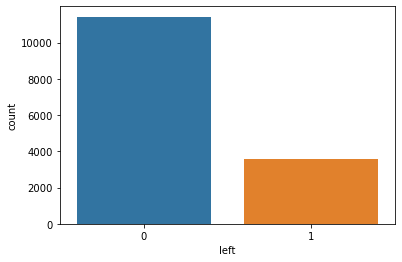

In [12]:
sns.countplot(y)
print('Number of people who Left:',y.value_counts()[0])
print('Number of people who Stayed:',y.value_counts()[1])

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [14]:
to_be_scaled = ['number_project','average_montly_hours','time_spend_company']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
#We shall do one hot encoding for sales column
X.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [17]:
X = pd.get_dummies(X,columns = ['sales'])
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,0,low,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,medium,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,medium,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,low,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,low,0,0,0,0,0,0,0,1,0,0


In [18]:
X.drop(columns = ['sales_technical'],axis = 1,inplace = True)

In [19]:
#Scaling the 3 features which have integer values
X[['number_project','average_montly_hours','time_spend_company']] = sc.fit_transform(X[['number_project','average_montly_hours','time_spend_company']])

In [20]:
#Lets review the data once more
X.head()
#Salary column needs ordinal encoding, so lets do that

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support
0,0.38,0.53,-1.462863,-0.882040,-0.341235,0,0,low,0,0,0,0,0,0,0,1,0
1,0.80,0.86,0.971113,1.220423,1.713436,0,0,medium,0,0,0,0,0,0,0,1,0
2,0.11,0.88,2.593763,1.420657,0.343655,0,0,medium,0,0,0,0,0,0,0,1,0
3,0.72,0.87,0.971113,0.439508,1.028546,0,0,low,0,0,0,0,0,0,0,1,0
4,0.37,0.52,-1.462863,-0.841993,-0.341235,0,0,low,0,0,0,0,0,0,0,1,0


In [21]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
X['salary'] = oe.fit_transform(X[['salary']])

In [22]:
#Lets check one last
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support
0,0.38,0.53,-1.462863,-0.882040,-0.341235,0,0,1.0,0,0,0,0,0,0,0,1,0
1,0.80,0.86,0.971113,1.220423,1.713436,0,0,2.0,0,0,0,0,0,0,0,1,0
2,0.11,0.88,2.593763,1.420657,0.343655,0,0,2.0,0,0,0,0,0,0,0,1,0
3,0.72,0.87,0.971113,0.439508,1.028546,0,0,1.0,0,0,0,0,0,0,0,1,0
4,0.37,0.52,-1.462863,-0.841993,-0.341235,0,0,1.0,0,0,0,0,0,0,0,1,0


In [23]:
#Splitting the data into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 4)

In [24]:
#Lets try out different models

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [27]:
#Lets check linear model (Logistic Regression and see how the decision boundary is made along with the score!)

In [28]:
lor = LogisticRegression()
lor.fit(X_train,y_train)
print(lor.score(X_train,y_train))
print(lor.score(X_test,y_test))
#Clearly the model is not overfitting but the performance is okay at best

0.7654013690105788
0.7677333333333334


In [29]:
X_train = X_train.values
y_train = y_train.values

In [30]:
X.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary', 'sales_IT', 'sales_RandD',
       'sales_accounting', 'sales_hr', 'sales_management', 'sales_marketing',
       'sales_product_mng', 'sales_sales', 'sales_support'],
      dtype='object')

In [52]:
lir = LogisticRegression()
lir.fit(X_train[:,[2,3]],y_train)

LogisticRegression()

In [51]:
X_train[:,[2,3]]

array([[-0.65153764, -0.2212659 ],
       [ 0.15978764,  0.35941425],
       [-1.46286291, -1.2624855 ],
       ...,
       [ 0.15978764, -0.02103137],
       [ 0.15978764, -0.40147699],
       [ 0.97111292,  0.31936734]])

<ipython-input-53-8a24616ac7bb>:16: UserWarning: No contour levels were found within the data range.
  plt.contour(xx,yy,Z,alpha = 0.7,cmap = ListedColormap('blue','red'))


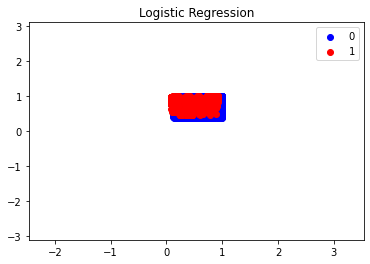

In [53]:
from matplotlib.colors import ListedColormap
clf = lir
h = 0.1

X_plot, z_plot = X_train,y_train
x_min, x_max = X_plot[:,2].min()-1,X_plot[:,2].max()+1
y_min, y_max = X_plot[:,3].min()-1,X_plot[:,3].max()+1


xx,yy = np.meshgrid(np.arange(x_min,x_max,h),
                   np.arange(y_min,y_max,h))

Z = clf.predict(np.array([xx.ravel(),yy.ravel()]).T) 
Z = Z.reshape(xx.shape)
                
plt.contour(xx,yy,Z,alpha = 0.7,cmap = ListedColormap('blue','red'))

for i , j in enumerate(np.unique(z_plot)):
    plt.scatter(X_plot[z_plot == j,0],X_plot[z_plot == j,1], 
                c = ['blue','red'][i],cmap = ListedColormap('blue','red'), label = j)
    
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title('Logistic Regression')
plt.legend()
plt.show()

In [92]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train,y_train)
print(knn.score(X_train,y_train))
print(knn.score(X_test,y_test))
#This model is performing pretty well! Lets see the tree based models!

0.9609743088274514
0.9416


In [97]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
print(dt.score(X_train,y_train))
print(dt.score(X_test,y_test))
#These are performing even better

1.0
0.9752


In [100]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))
#The tree based models are performing very well!

1.0
0.9914666666666667
